In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path('__file__').resolve().parent.parent))

In [5]:
from hundun.equations.lorenz import Lorenz
from hundun.utils._draw import Drawing
from hundun.exploration._utils import embedding_seq
from hundun.exploration._gp import calc_correlation_dimention_w_gp

In [6]:
l = Lorenz.on_attractor()
l.solve_n_times(5000)
u_seq = l.u_seq

/Users/kosh/workspace/hundun/hundun/exploration/_gp.py:42: RuntimeWarning: divide by zero encountered in log
  log_cr, log_r = _np.log(crs[i:i+batch_ave]), _np.log(rs[i:i+batch_ave])
/Users/kosh/workspace/hundun/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/kosh/workspace/hundun/hundun/exploration/_gp.py:42: RuntimeWarning: divide by zero encountered in log
  log_cr, log_r = _np.log(crs[i:i+batch_ave]), _np.log(rs[i:i+batch_ave])
/Users/kosh/workspace/hundun/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/kosh/workspace/hundun/hundun/exploration/_gp.py:42: RuntimeWarning: divide by zero encountered in log
  log_cr, log_r = _np.log(crs[i:i+batch_ave]), _np.log(rs[i:i+batch_ave])
/Users/kosh/workspace/hundun/venv/lib/python3.8/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: in

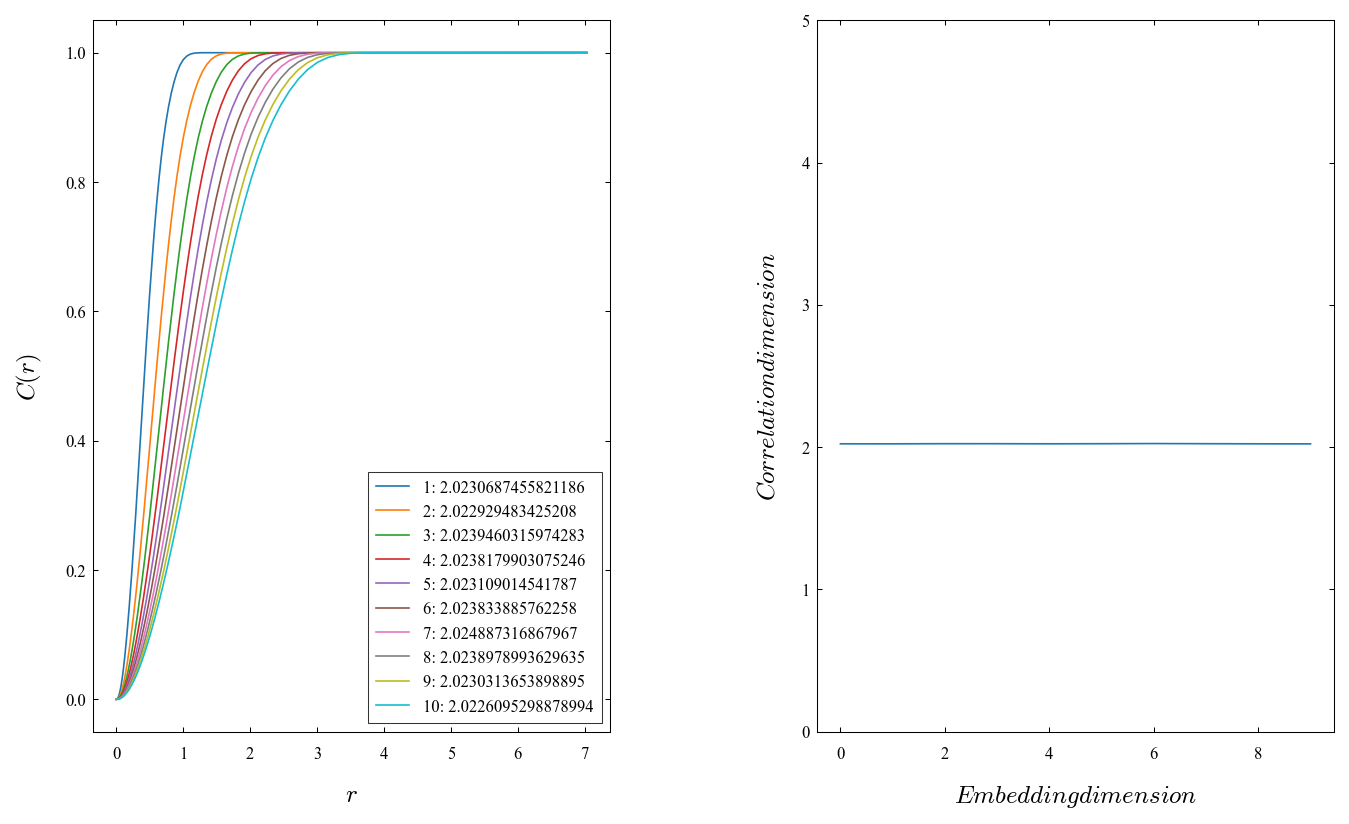

In [7]:
d= Drawing(1, 2)

slopes = []
for i in range(1, 11):
    e_seq = embedding_seq(u_seq, 1, i)

    slope, rs, crs = calc_correlation_dimention_w_gp(e_seq)
    d[0,0].plot(rs, crs, label=f'{i}: {slope}')

    slopes.append(slope)
d[0,0].legend()
d[0,0].set_axis_label('r', 'C(r)')

d[0,1].plot(slopes)
d[0,1].set_ylim(0, 5)
d[0,1].set_axis_label('Embedding dimension', 'Correlation dimension')

d.show()
d.close()